In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
sales= pd.read_csv('../input/supermarket-sales/supermarket_sales - Sheet1.csv')
sales


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [7]:
#check data types
sales.dtypes
#we don't have any empty columns

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [8]:
#check for missing values
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
#total sales by city
total=sales.groupby('City')['Total'].sum()
total

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

Text(0, 0.5, 'Total sales')

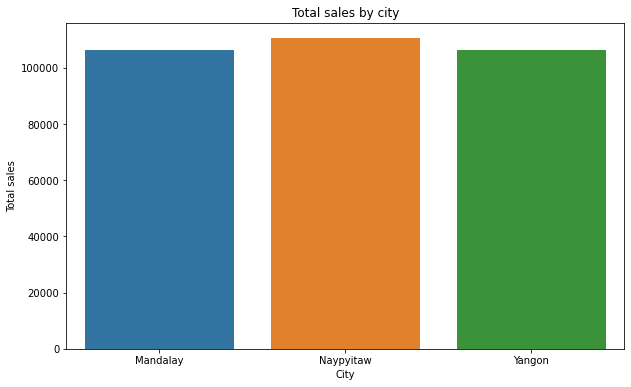

In [10]:
#bar graph to show total sales by city
plt.figure(figsize=(10,6))

sns.barplot (x=list(total.index), y=list(total.values))
plt.title('Total sales by city')
plt.xlabel('City')
plt.ylabel('Total sales')

From this graph we can conlcude that the highest sales were made by the branch in Naypyitaw City

In [11]:
#which product line makes most profit?
sales_by_line=sales.groupby('Product line')['gross income'].sum()

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

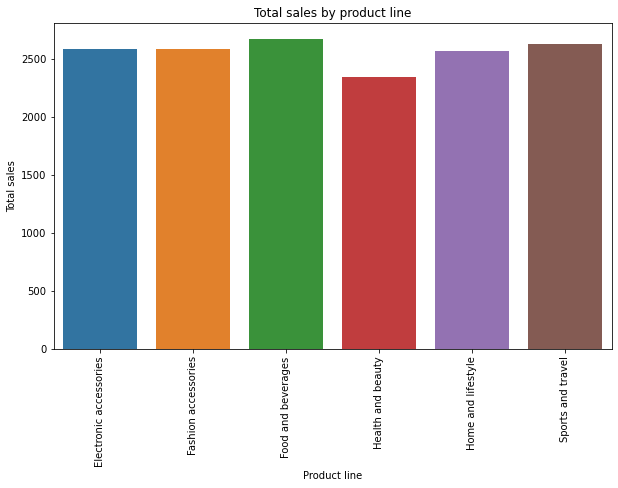

In [12]:
#bar graph to show total sales by branch
plt.figure(figsize=(10,6))

sns.barplot (x=list(sales_by_line.index), y=list(sales_by_line.values))
plt.title('Total sales by product line')
plt.xlabel('Product line')
plt.ylabel('Total sales')
plt.xticks(rotation=90)

In [13]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
#the payment methods prefered by male/female
gender_pay = sales.groupby('Gender')['Payment'].value_counts()
gender_pay

Gender  Payment    
Female  Cash           178
        Credit card    163
        Ewallet        160
Male    Ewallet        185
        Cash           166
        Credit card    148
Name: Payment, dtype: int64

Text(0, 0.5, 'Number of customers')

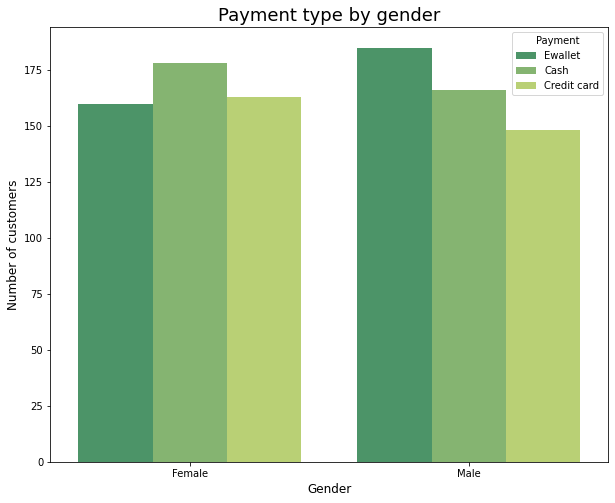

In [15]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = "Gender", hue = "Payment", data = sales, palette= "summer")
ax.set_title(label = "Payment type by gender", fontsize = 18)
ax.set_xlabel(xlabel = "Gender", fontsize = 12)
ax.set_ylabel(ylabel = "Number of customers", fontsize = 12)


In [16]:
#income by rating
city_income = (sales.groupby('City')['Product line'].value_counts())
city_income

City       Product line          
Mandalay   Fashion accessories       62
           Sports and travel         62
           Electronic accessories    55
           Health and beauty         53
           Food and beverages        50
           Home and lifestyle        50
Naypyitaw  Food and beverages        66
           Fashion accessories       65
           Electronic accessories    55
           Health and beauty         52
           Home and lifestyle        45
           Sports and travel         45
Yangon     Home and lifestyle        65
           Electronic accessories    60
           Sports and travel         59
           Food and beverages        58
           Fashion accessories       51
           Health and beauty         47
Name: Product line, dtype: int64

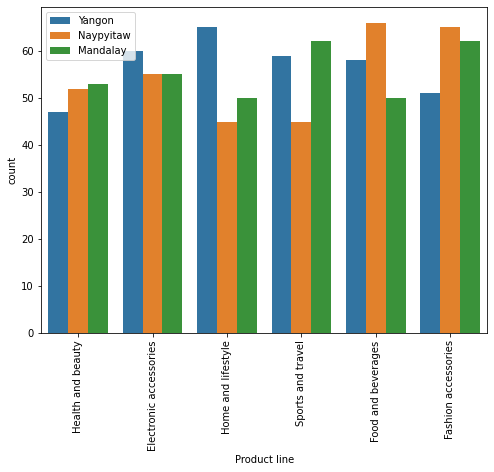

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='Product line', hue ='City', data=sales)
plt.xticks(rotation=90)
plt.legend(loc= 'upper left')

This bar graph shows us the most profitable line for
    - Yangon is Home and lifestyle 
    - Naypyitaw is Food and beverages 
    - Mandalay is Fashion accessories

In [26]:
#parse time and grab the hour
sales['hour']= pd.to_datetime(sales.Time)
sales['hour']=sales.hour.dt.hour

In [31]:
#total sales by time of the day, hour to find out at what time of the day most customers shop
sales_time = sales.groupby('hour')['Total'].sum()
sales_time

hour
10    31421.4810
11    30377.3295
12    26065.8825
13    34723.2270
14    30828.3990
15    31179.5085
16    25226.3235
17    24445.2180
18    26030.3400
19    39699.5130
20    22969.5270
Name: Total, dtype: float64

Text(0, 0.5, 'Total sales')

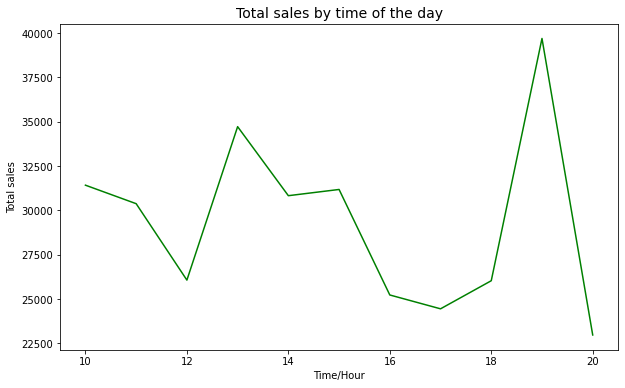

In [39]:
plt.figure(figsize=(10,6))
sns.lineplot(x=list(sales_time.index), y=list(sales_time.values), color='green')
plt.title('Total sales by time of the day', size = 14)
plt.xlabel('Time/Hour')
plt.ylabel('Total sales')


BY looking at this graph, we can conclude that most customers shop at 19hrs.

In [50]:
#does supermarket rating has any relation with the total sales
sales_rating=sales.groupby('Rating')['Total'].sum()

Text(0, 0.5, 'Total sales')

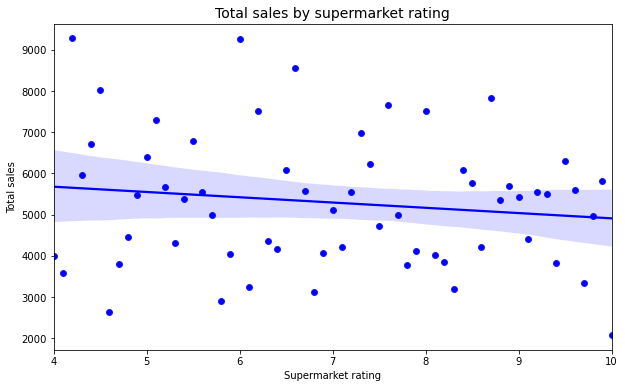

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=list(sales_rating.index), y=list(sales_rating.values), color='blue')
sns.regplot(x=list(sales_rating.index), y=list(sales_rating.values), color='blue')
plt.title('Total sales by supermarket rating', size = 14)
plt.xlabel('Supermarket rating')
plt.ylabel('Total sales')

It doesn't look like there is any correlation between total sales and shop rating